# Disclaimer!! here we did show all the data processing and GIS integration that we wrote in report, however for simplicity we only included pipeline for downlink as for uplink and scanner they are same just spesifically tuned for uplink and scanner features. As we skipped them here,  for Fusion we just provided class. But our main logic in data processing and training is provided here

In [1]:
DL_FEATURES = [
    'NR_UE_Throughput_PDCP_DL', 'NR_UE_PCI_0', 'NR_UE_RB_Num_DL_0',
    'NR_UE_Pathloss_DL_0', 'App_Throughput_DL', 'NR_UE_Power_Tx_PUSCH_0',
    'NR_UE_RSRP_0', 'NR_UE_BLER_DL_0', 'NR_UE_NACK_Rate_DL_0',
    'NR_UE_NACK_Rate_UL_0', 'NR_UE_Ack_As_Nack_DL_0', 'NR_UE_Nbr_RSRP_0',
    'NR_UE_Nbr_PCI_0', 'NR_UE_SINR_0', 'NR_UE_RSRQ_0', 'NR_UE_Nbr_RSRQ_0',
    'NR_UE_Nbr_PCI_1', 'NR_UE_Nbr_PCI_2', 'NR_UE_Timing_Advance','NR_UE_Nbr_RSRP_1', 'NR_UE_Nbr_RSRP_2'
]

UL_FEATURES = [
    'NR_UE_Throughput_RLC_UL', 'NR_UE_PCI_0', 'NR_UE_Power_Tx_PUSCH_0',
    'App_Throughput_UL', 'NR_UE_NACK_Rate_UL_0', 'NR_UE_RSRP_0',
    'NR_UE_Nbr_PCI_0', 'NR_UE_RSRQ_0', 'NR_UE_Nbr_RSRP_0',
    'NR_UE_Nbr_RSRQ_0', 'NR_UE_Nbr_RSRP_1', 'NR_UE_SINR_0',
    'NR_UE_Nbr_PCI_1', 'NR_UE_Nbr_RSRQ_1', 'NR_UE_Timing_Advance'
]

SCAN_FEATURES = [
    'NR_Scan_PCI_SortedBy_RSRP_0', 'NR_Scan_PCI_SortedBy_RSRP_1',
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_0', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_2',
    'NR_Scan_SSB_RSRP_SortedBy_RSRP_1', 'NR_Scan_NR_ARFCN',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0', 'NR_Scan_SSB_SINR_SortedBy_RSRP_0',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_2', 'NR_Scan_SSB_SINR_SortedBy_RSRP_2',
    'NR_Scan_PCI_SortedBy_RSRP_2', 'NR_Scan_SSB_SINR_SortedBy_RSRP_1',
    'NR_Scan_SSB_RSRQ_SortedBy_RSRP_1'
]


In [2]:
import pandas as pd


In [ ]:
import pandas as pd
import os

RAW_DATA_DIR = "../data/raw"

dl1 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v1_5G_DL.xlsx"), sheet_name="Series Formatted Data")
dl2 = pd.read_excel(os.path.join(RAW_DATA_DIR, "v2_5G_DL.xlsx"), sheet_name="Series Formatted Data")


dl = pd.concat([dl1, dl2], ignore_index=True)
dl = dl[["Latitude", "Longitude"] + DL_FEATURES].dropna(subset=["Latitude", "Longitude"])
dl["loc_key"] = dl["Latitude"].round(5).astype(str) + "_" + dl["Longitude"].round(5).astype(str)

dl.head()


,Latitude,Longitude,NR_UE_Throughput_PDCP_DL,NR_UE_PCI_0,NR_UE_RB_Num_DL_0,NR_UE_Pathloss_DL_0,App_Throughput_DL,NR_UE_Power_Tx_PUSCH_0,NR_UE_RSRP_0,NR_UE_BLER_DL_0,...,NR_UE_Nbr_PCI_0,NR_UE_SINR_0,NR_UE_RSRQ_0,NR_UE_Nbr_RSRQ_0,NR_UE_Nbr_PCI_1,NR_UE_Nbr_PCI_2,NR_UE_Timing_Advance,NR_UE_Nbr_RSRP_1,NR_UE_Nbr_RSRP_2,loc_key
2,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
3,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
4,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
5,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949
6,41.10723,29.02949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.10723_29.02949


In [ ]:
# drop rows with all signal-related columns missing
signal_cols = [
    'NR_UE_RSRP_0', 'NR_UE_SINR_0', 'NR_UE_RSRQ_0',
    'NR_UE_Throughput_PDCP_DL', 'NR_UE_Pathloss_DL_0', 'App_Throughput_DL'
]
dl = dl.dropna(subset=signal_cols, how='all')

def is_useless_signal(row):
    critical_cols = [
        "NR_UE_RSRP_0", "NR_UE_SINR_0", "NR_UE_RSRQ_0",
        "NR_UE_Nbr_RSRP_0", "NR_UE_Nbr_RSRP_1", "NR_UE_Nbr_RSRP_2"
    ]
    if row[critical_cols].isna().all():
        return True
    if pd.notna(row["NR_UE_RSRP_0"]) and pd.notna(row["NR_UE_SINR_0"]):
        if (row["NR_UE_RSRP_0"] < -125) and (row["NR_UE_SINR_0"] < -5):
            return True
    return False

dl["bad_signal"] = dl.apply(is_useless_signal, axis=1)
dl = dl[~dl["bad_signal"]].copy()
dl.drop(columns="bad_signal", inplace=True)

print(f" Remaining after signal filtering: {len(dl)} rows")


 Remaining after signal filtering: 5746 rows


In [5]:
def load_base_station_config() -> pd.DataFrame:
    path = os.path.join(RAW_DATA_DIR, "İTÜ 5G Hücre Bilgileri.xlsx")
    df = pd.read_excel(path, sheet_name="Hücre tablosu")

    col_map = {}
    for col in df.columns:
        lower = col.lower()
        if "latitude" in lower:
            col_map[col] = "lat"
        elif "longitude" in lower:
            col_map[col] = "lon"
        elif "azimuth" in lower:
            col_map[col] = "azimuth"
        elif "height" in lower:
            col_map[col] = "height"
        elif "pci" in lower:
            col_map[col] = "pci"

    df.rename(columns=col_map, inplace=True)
    needed_columns = ["lat", "lon", "azimuth", "height", "pci"]
    df = df[[col for col in needed_columns if col in df.columns]]
    return df

def convert_pci(df):
    coord = load_base_station_config()
    pci_columns = [col for col in df.columns if 'PCI' in col]

    for pci_col in pci_columns:
        if pci_col not in df.columns:
            continue

        df[pci_col] = pd.to_numeric(df[pci_col], errors='coerce').astype('Int64')

        merge_df = coord.rename(columns={
            'lat': f'{pci_col}_lat',
            'lon': f'{pci_col}_lon',
            'azimuth': f'{pci_col}_azimuth',
            'height': f'{pci_col}_height',
            'pci': pci_col
        })

        df = df.merge(merge_df, how='left', on=pci_col)
        df[f'{pci_col}_bs_found'] = ~df[f'{pci_col}_lat'].isna()

    return df


In [6]:
dl = convert_pci(dl)
print(f" PCI-to-BS enrichment completed. Example columns: {[col for col in dl.columns if '_lat' in col]}")


 PCI-to-BS enrichment completed. Example columns: ['NR_UE_PCI_0_lat', 'NR_UE_Nbr_PCI_0_lat', 'NR_UE_Nbr_PCI_1_lat', 'NR_UE_Nbr_PCI_2_lat']


In [7]:
import numpy as np

In [8]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # meters
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def bearing_from_bs_to_ue(bs_lat, bs_lon, ue_lat, ue_lon):
    lat1, lon1, lat2, lon2 = map(np.radians, [bs_lat, bs_lon, ue_lat, ue_lon])
    dlon = lon2 - lon1
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    return (np.degrees(np.arctan2(x, y)) + 360) % 360


In [9]:
def apply_geometry_features(df, pci_col_base="NR_UE_PCI_0"):
    bs_lat = df[f"{pci_col_base}_lat"]
    bs_lon = df[f"{pci_col_base}_lon"]
    bs_azimuth = df[f"{pci_col_base}_azimuth"]
    ue_lat = df["Latitude"]
    ue_lon = df["Longitude"]

    df[f"{pci_col_base}_distance"] = haversine_distance(bs_lat, bs_lon, ue_lat, ue_lon)
    df[f"{pci_col_base}_bearing"] = bearing_from_bs_to_ue(bs_lat, bs_lon, ue_lat, ue_lon)
    delta_angle = np.abs(df[f"{pci_col_base}_bearing"] - bs_azimuth)
    df[f"{pci_col_base}_angle_offset"] = np.minimum(delta_angle, 360 - delta_angle)
    df[f"{pci_col_base}_cos_offset"] = np.cos(np.radians(df[f"{pci_col_base}_angle_offset"]))

    rsrp_col = f"{pci_col_base.replace('PCI', 'RSRP')}"
    if rsrp_col in df.columns:
        df[f"{pci_col_base}_rsrp_weighted"] = df[rsrp_col] * df[f"{pci_col_base}_cos_offset"]

    return df


In [10]:
for pci_base in ["NR_UE_PCI_0", "NR_UE_Nbr_PCI_0", "NR_UE_Nbr_PCI_1", "NR_UE_Nbr_PCI_2"]:
    if f"{pci_base}_lat" in dl.columns:
        dl = apply_geometry_features(dl, pci_base)

print("geometry features added")


geometry features added


In [11]:
def estimate_weighted_centroid(df, pci_rsrp_map):
    lat_sum = np.zeros(len(df))
    lon_sum = np.zeros(len(df))
    weight_sum = np.zeros(len(df))

    for pci_col, rsrp_col in pci_rsrp_map.items():
        lat_col = f"{pci_col}_lat"
        lon_col = f"{pci_col}_lon"

        valid = df[lat_col].notna() & df[lon_col].notna() & df[rsrp_col].notna()
        weights = df.loc[valid, rsrp_col].astype(float)
        lat = df.loc[valid, lat_col]
        lon = df.loc[valid, lon_col]

        lat_sum[valid] += lat * (weights - weights.min())
        lon_sum[valid] += lon * (weights - weights.min())
        weight_sum[valid] += (weights - weights.min())

    lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
    lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)

    return lat_pred, lon_pred


In [12]:
pci_rsrp_map = {
    "NR_UE_PCI_0": "NR_UE_RSRP_0",
    "NR_UE_Nbr_PCI_0": "NR_UE_Nbr_RSRP_0",
    "NR_UE_Nbr_PCI_1": "NR_UE_Nbr_RSRP_1",
    "NR_UE_Nbr_PCI_2": "NR_UE_Nbr_RSRP_2",
}

dl["wcentroid_lat_pred"], dl["wcentroid_lon_pred"] = estimate_weighted_centroid(dl, pci_rsrp_map)

print("weighted centroid predictions computed.")


weighted centroid predictions computed.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25000\395689686.py:19: RuntimeWarning: invalid value encountered in divide
  lat_pred = np.where(weight_sum != 0, lat_sum / weight_sum, np.nan)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25000\395689686.py:20: RuntimeWarning: invalid value encountered in divide
  lon_pred = np.where(weight_sum != 0, lon_sum / weight_sum, np.nan)


In [13]:
from sklearn.neighbors import NearestNeighbors

def estimate_knn_fingerprint(train_df, test_df, feature_cols, n_neighbors=1):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto')
    nbrs.fit(train_df[feature_cols])

    distances, indices = nbrs.kneighbors(test_df[feature_cols])
    lat_pred = train_df.iloc[indices[:, 0]]['Latitude'].values
    lon_pred = train_df.iloc[indices[:, 0]]['Longitude'].values

    return lat_pred, lon_pred


In [14]:
import numpy as np

def estimate_vector_centroid_lookup(df, pci_rsrp_map, min_rsrp=-130):

    lat_preds = []
    lon_preds = []

    for _, row in df.iterrows():
        vec_sum_x = 0
        vec_sum_y = 0
        total_weight = 0

        for pci, rsrp_col in pci_rsrp_map.items():
            lat_col = f"{pci}_lat"
            lon_col = f"{pci}_lon"
            azi_col = f"{pci}_azimuth"

            if (
                rsrp_col in row and
                pd.notna(row[rsrp_col]) and
                lat_col in row and pd.notna(row[lat_col]) and
                lon_col in row and pd.notna(row[lon_col]) and
                azi_col in row and pd.notna(row[azi_col])
            ):

                weight = max(min_rsrp, row[rsrp_col])
                weight = (weight - min_rsrp)

                azimuth_rad = np.deg2rad(row[azi_col])
                dx = np.sin(azimuth_rad)
                dy = np.cos(azimuth_rad)

                vec_sum_x += dx * weight
                vec_sum_y += dy * weight
                total_weight += weight

        if total_weight == 0:
            lat_preds.append(np.nan)
            lon_preds.append(np.nan)
        else:
            scale = 0.0006 

            pred_lat = row["Latitude"] + scale * (vec_sum_y / total_weight)
            pred_lon = row["Longitude"] + scale * (vec_sum_x / total_weight)

            lat_preds.append(pred_lat)
            lon_preds.append(pred_lon)

    return pd.Series(lat_preds), pd.Series(lon_preds)


In [15]:

dl["vcentroid_lat_pred"], dl["vcentroid_lon_pred"] = estimate_vector_centroid_lookup(dl, pci_rsrp_map)


In [16]:
# aggregation functions
agg_funcs = ["mean", "std", "min", "max", "count"]

# aggregate dl features
signal_agg = dl.groupby("loc_key").agg({col: agg_funcs for col in DL_FEATURES})
signal_agg.columns = [f"{col}_{stat}" for col, stat in signal_agg.columns]
signal_agg = signal_agg.reset_index()


pred_cols = ["wcentroid_lat_pred", "wcentroid_lon_pred", "vcentroid_lat_pred", "vcentroid_lon_pred"]
pred_cols_existing = [col for col in pred_cols if col in dl.columns]
pred_agg = dl.groupby("loc_key")[pred_cols_existing].mean().reset_index()

# merge with lan/lot groung truth
lat_lon = dl.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()


dl_agg2 = signal_agg.merge(pred_agg, on="loc_key", how="left")
dl_agg2 = dl_agg2.merge(lat_lon, on="loc_key", how="left")

print(f" Aggregated dataset shape: {dl_agg2.shape}")


 Aggregated dataset shape: (2730, 112)


In [17]:
from sklearn.model_selection import train_test_split

X = dl_agg2.drop(columns=["Latitude", "Longitude", "loc_key"])
y = dl_agg2[["Latitude", "Longitude"]]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")


Training samples: 2184, Test samples: 546


In [ ]:
from xgboost import XGBRegressor
import numpy as np

model = XGBRegressor(
    subsample=1.0,
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [ ]:
def vectorized_haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # radius of Earth in meters
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

haversine_errors = vectorized_haversine(
    y_test["Latitude"].values,
    y_test["Longitude"].values,
    y_pred[:, 0],
    y_pred[:, 1]
)

print(f"Haversine RMSE (meters): {np.sqrt(np.mean(haversine_errors ** 2)):.2f}")
print(f"Mean Error: {np.mean(haversine_errors):.2f} m")
print(f"Median Error: {np.median(haversine_errors):.2f} m")
print(f"Max Error: {np.max(haversine_errors):.2f} m")


Haversine RMSE (meters): 21.38
Mean Error: 16.81 m
Median Error: 13.70 m
Max Error: 127.37 m


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


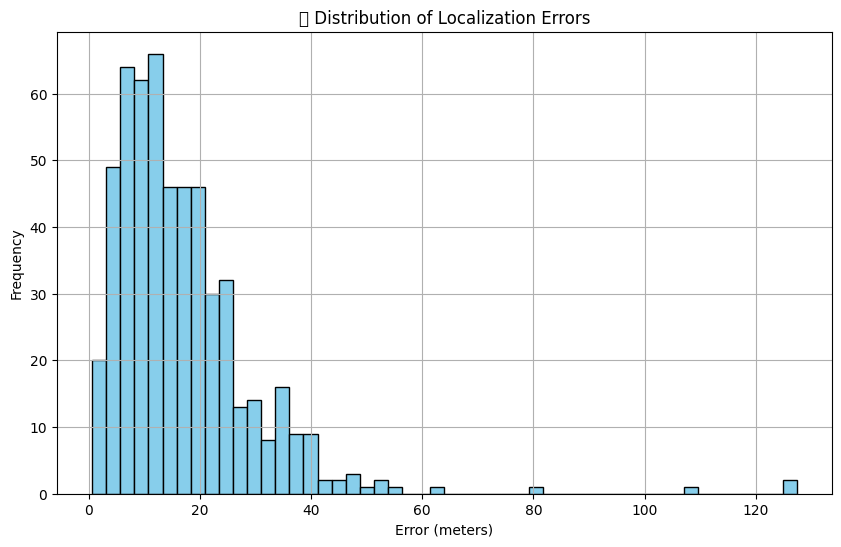

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(haversine_errors, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Localization Errors")
plt.xlabel("Error (meters)")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()


In [21]:
from sklearn.metrics import r2_score

# Convert to NumPy arrays if not already
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test
y_pred_np = y_pred.to_numpy() if isinstance(y_pred, pd.DataFrame) else y_pred

# R² Scores
r2_lat = r2_score(y_test_np[:, 0], y_pred_np[:, 0])
r2_lon = r2_score(y_test_np[:, 1], y_pred_np[:, 1])

print(f"R² Score - Latitude: {r2_lat:.4f}")
print(f"R² Score - Longitude: {r2_lon:.4f}")


R² Score - Latitude: 0.9949
R² Score - Longitude: 0.9949


### Here r2 score is not great indicator of our model's sucess as prediction is working wihtin very small interval of predicted lon/lat values

DL (spatial split) Haversine RMSE: 21.22 m
Mean Error: 17.17 m
Median Error: 13.65 m
Max Error: 90.39 m

In [23]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Step 1: Get unique loc_keys with coordinates
loc_df = dl.groupby("loc_key")[["Latitude", "Longitude"]].first().reset_index()

# Step 2: Cluster them spatially (e.g., into 20 regions)
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
loc_df["region"] = kmeans.fit_predict(loc_df[["Latitude", "Longitude"]])

# Step 3: Stratified train/test split by region
train_loc_keys, test_loc_keys = train_test_split(
    loc_df["loc_key"], test_size=0.2, stratify=loc_df["region"], random_state=42
)


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

#  converting dl_agg2 to GeoDataFrame
dl_agg2["geometry"] = dl_agg2.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)
dl_gdf = gpd.GeoDataFrame(dl_agg2, geometry="geometry", crs="EPSG:4326")


def load_layer(name):
    base = "./"  
    return gpd.read_file(f"../data/raw/maps/{base}{name}_EPSG4326.shp")

buildings = load_layer("ITU_3DBINA")
vegetation = load_layer("ITU_3DVEGETATION")
walls = load_layer("ITU_SINIRDUVAR")
water = load_layer("ITU_SUKUTLESI")


dl_gdf["dist_to_building"] = dl_gdf.geometry.apply(lambda x: buildings.distance(x).min())
dl_gdf["inside_vegetation"] = dl_gdf.geometry.apply(lambda x: vegetation.contains(x).any())


wall_polygon = walls.unary_union.convex_hull
dl_gdf["inside_campus"] = dl_gdf.geometry.within(wall_polygon)

dl_gdf["dist_to_water"] = dl_gdf.geometry.apply(lambda x: water.distance(x).min())


dl_gdf.drop(columns="geometry", inplace=True)

dl_agg3 = dl_gdf 


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25000\627220656.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dl_gdf["dist_to_building"] = dl_gdf.geometry.apply(lambda x: buildings.distance(x).min())
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shapely\measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25000\627220656.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dl_gdf["dist_to_water"] = dl_gdf.geometry.apply(lambda x: water.distance(x).min())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

loc_df = dl_agg3[["loc_key", "Latitude", "Longitude"]].drop_duplicates()
n_clusters = 20

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
loc_df["region"] = kmeans.fit_predict(loc_df[["Latitude", "Longitude"]])

train_loc_keys, test_loc_keys = train_test_split(
    loc_df["loc_key"], test_size=0.2, stratify=loc_df["region"], random_state=42
)

dl_train = dl_agg3[dl_agg3["loc_key"].isin(train_loc_keys)].reset_index(drop=True)
dl_test = dl_agg3[dl_agg3["loc_key"].isin(test_loc_keys)].reset_index(drop=True)


drop_cols = ["Latitude", "Longitude", "loc_key"]
X_train = dl_train.drop(columns=drop_cols)
y_train = dl_train[["Latitude", "Longitude"]]

X_test = dl_test.drop(columns=drop_cols)
y_test = dl_test[["Latitude", "Longitude"]]


model = XGBRegressor(
    subsample=1.0,
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


def haversine_array(lat1, lon1, lat2, lon2):
    R = 6371000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

lat_true, lon_true = y_test["Latitude"].values, y_test["Longitude"].values
lat_pred, lon_pred = y_pred[:, 0], y_pred[:, 1]
errors = haversine_array(lat_true, lon_true, lat_pred, lon_pred)

print("Haversine RMSE (meters):", round(np.sqrt(np.mean(errors**2)), 2))
print("Mean Error:", round(np.mean(errors), 2), "m")
print("Median Error:", round(np.median(errors), 2), "m")
print("Max Error:", round(np.max(errors), 2), "m")


Haversine RMSE (meters): 19.88
Mean Error: 16.38 m
Median Error: 13.51 m
Max Error: 101.18 m


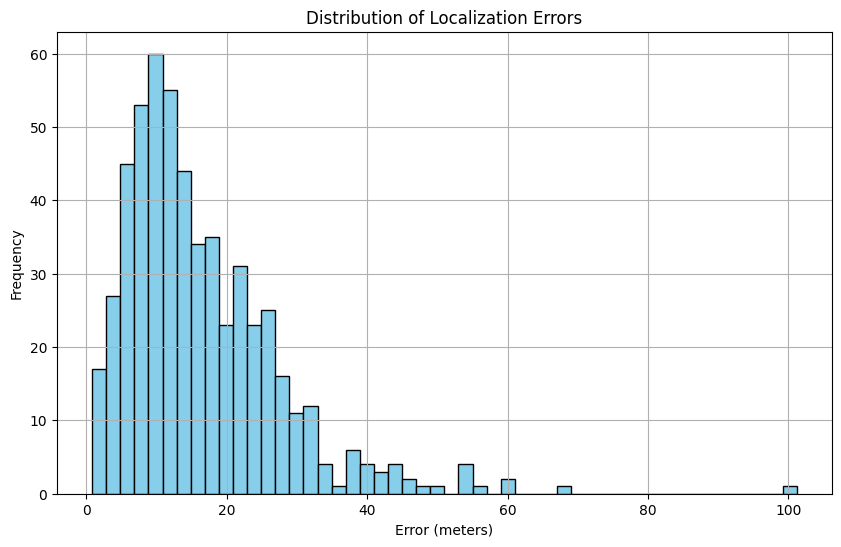

In [26]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Localization Errors")
plt.xlabel("Error (meters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [27]:

importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("Top 20 Important Features:")
print(importance_df.head(20))


Top 20 Important Features:
                   feature  importance
108     vcentroid_lon_pred    0.315026
107     vcentroid_lat_pred    0.185228
30       NR_UE_RSRP_0_mean    0.160332
32        NR_UE_RSRP_0_min    0.093530
7          NR_UE_PCI_0_min    0.071278
106     wcentroid_lon_pred    0.051853
33        NR_UE_RSRP_0_max    0.026986
112          dist_to_water    0.015702
105     wcentroid_lat_pred    0.012251
68        NR_UE_SINR_0_max    0.008654
8          NR_UE_PCI_0_max    0.008456
5         NR_UE_PCI_0_mean    0.007641
67        NR_UE_SINR_0_min    0.007126
109       dist_to_building    0.003891
63     NR_UE_Nbr_PCI_0_max    0.003774
55   NR_UE_Nbr_RSRP_0_mean    0.003711
60    NR_UE_Nbr_PCI_0_mean    0.003085
78    NR_UE_Nbr_RSRQ_0_max    0.002657
57    NR_UE_Nbr_RSRP_0_min    0.002574
62     NR_UE_Nbr_PCI_0_min    0.002537


In [28]:
dl_agg3.columns

Index(['loc_key', 'NR_UE_Throughput_PDCP_DL_mean',
       'NR_UE_Throughput_PDCP_DL_std', 'NR_UE_Throughput_PDCP_DL_min',
       'NR_UE_Throughput_PDCP_DL_max', 'NR_UE_Throughput_PDCP_DL_count',
       'NR_UE_PCI_0_mean', 'NR_UE_PCI_0_std', 'NR_UE_PCI_0_min',
       'NR_UE_PCI_0_max',
       ...
       'wcentroid_lat_pred', 'wcentroid_lon_pred', 'vcentroid_lat_pred',
       'vcentroid_lon_pred', 'Latitude', 'Longitude', 'dist_to_building',
       'inside_vegetation', 'inside_campus', 'dist_to_water'],
      dtype='object', length=116)

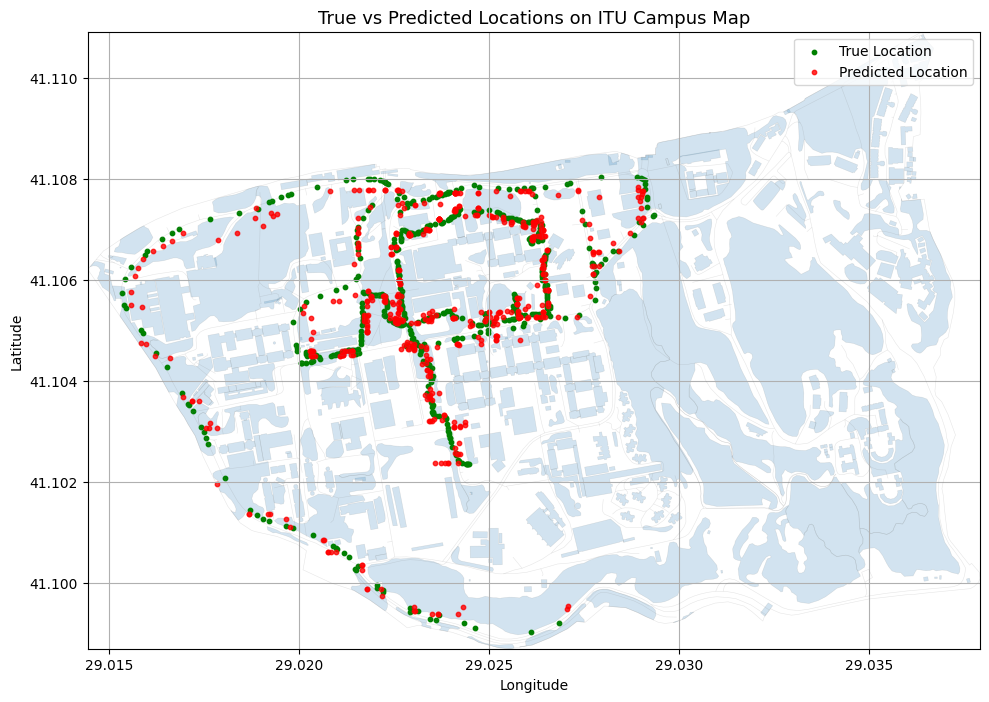

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
import gc


true_gdf = gpd.GeoDataFrame(
    y_test.copy(),
    geometry=gpd.points_from_xy(y_test["Longitude"], y_test["Latitude"]),
    crs="EPSG:4326"
)
pred_gdf = gpd.GeoDataFrame(
    pd.DataFrame({"Latitude": y_pred[:, 0], "Longitude": y_pred[:, 1]}),
    geometry=gpd.points_from_xy(y_pred[:, 1], y_pred[:, 0]),
    crs="EPSG:4326"
)

#load base wall for bounding box
wall_gdf = gpd.read_file("../data/raw/maps/ITU_SINIRDUVAR_EPSG4326.shp")


fig, ax = plt.subplots(figsize=(10, 10))

# loading and plotting all the relevant layers
VECTOR_DIR = "../data/raw/maps/"
for root, _, files in os.walk(VECTOR_DIR):
    for fname in files:
        if fname.lower().endswith(".shp"):
            try:
                gdf = gpd.read_file(os.path.join(root, fname)).to_crs(epsg=4326)
                gdf.plot(ax=ax, alpha=0.2, edgecolor='gray', linewidth=0.4)
                del gdf
                gc.collect()
            except Exception as e:
                print(f"Could not plot {fname}: {e}")

true_gdf.plot(ax=ax, color='green', markersize=10, label='True Location')
pred_gdf.plot(ax=ax, color='red', markersize=10, label='Predicted Location', alpha=0.8)

minx, miny, maxx, maxy = wall_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.title("True vs Predicted Locations on ITU Campus Map", fontsize=13)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

importance_dict = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Gain'])

top_features = importance_df.sort_values(by='Gain', ascending=False).head(15)



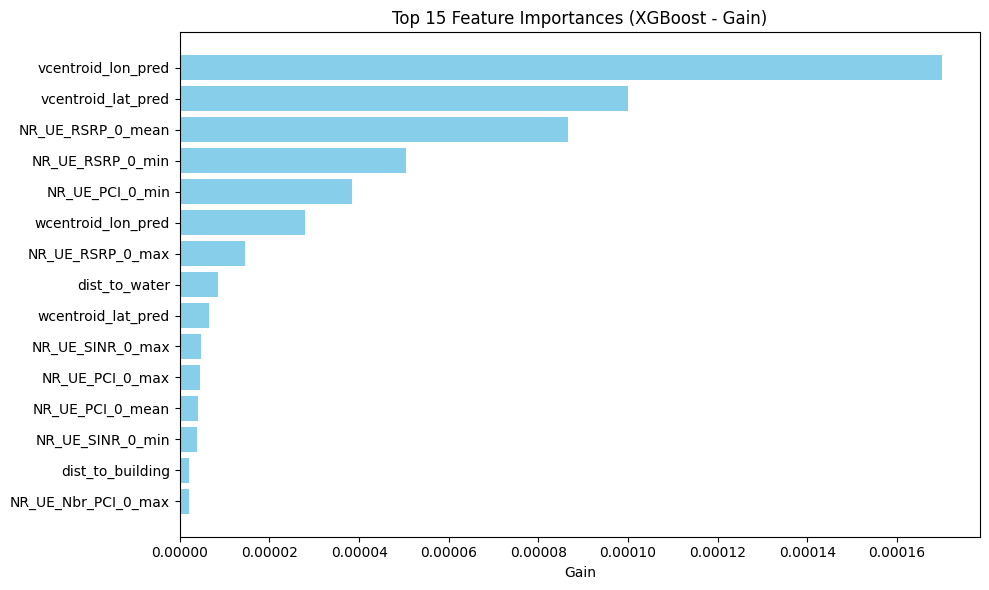

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Gain'], color='skyblue')
plt.xlabel('Gain')
plt.title('Top 15 Feature Importances (XGBoost - Gain)')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


In [ ]:
haversine_errors_dl = vectorized_haversine(
    y_test["Latitude"].values,
    y_test["Longitude"].values,
    y_pred[:, 0],
    y_pred[:, 1]
)

print(f"DL (spatial split) Haversine RMSE: {np.sqrt(np.mean(haversine_errors_dl ** 2)):.2f} m")
print(f"Mean Error: {np.mean(haversine_errors_dl):.2f} m")
print(f"Median Error: {np.median(haversine_errors_dl):.2f} m")
print(f"Max Error: {np.max(haversine_errors_dl):.2f} m")


DL (spatial split) Haversine RMSE: 19.88 m
Mean Error: 16.38 m
Median Error: 13.51 m
Max Error: 101.18 m


### Here values slightly differrent than in report, 1-2 meters difference as for convenience we didnot include scanner and uplink processing here. Pipeline is almost same, just features are different and at the end we do Late Fusion

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# here is example of our fusion class, it slightly differs sometimes we just usd
class UncertaintyWeightedFusion(nn.Module):
    def __init__(self):
        super(UncertaintyWeightedFusion, self).__init__()

    def forward(self, coord_preds, log_vars):
        inv_vars = torch.exp(-log_vars) 

        weighted_coords = coord_preds * inv_vars  
        sum_weighted = weighted_coords.sum(dim=1)

        weight_sums = inv_vars.sum(dim=1) 
        fused_coords = sum_weighted / weight_sums
        return fused_coords
